<a href="https://colab.research.google.com/github/ard99ian/computer-vision/blob/main/Daun_Herbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!wget --no-check-certificate \
    https://drive.google.com/file/d/1-eYWKBz70jVQxbjWzZU6ey63ofJdiKtZ/view?usp=sharing

--2021-11-16 10:20:50--  https://drive.google.com/file/d/1-eYWKBz70jVQxbjWzZU6ey63ofJdiKtZ/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 173.194.210.138, 173.194.210.102, 173.194.210.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing.3’

view?usp=sharing.3      [ <=>                ]  65.02K  --.-KB/s    in 0.004s  

2021-11-16 10:20:50 (17.3 MB/s) - ‘view?usp=sharing.3’ saved [66583]



In [34]:
import os
import zipfile

local_zip = '/content/Daun_Herbal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/temp')
zip_ref.close()

In [32]:
base_dir = '/content/Daun Herbal'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_daun_dir = os.path.join(train_dir, 'daun')
train_herbal_dir = os.path.join(train_dir, 'herbal')

validation_daun_dir = os.path.join(validation_dir, 'daun')
validation_herbal_dir = os.path.join(validation_dir, 'herbal')

In [35]:
print(os.listdir(train_daun_dir)[:10])
print(os.listdir(train_herbal_dir)[:10])

['15.jpg', '10.jpeg', '3.jpg', '13.jpg', '14.jpg', '16.jpg', '18.jpg', '11.webp', '4.jpg', '6.jpg']
['15.jpg', '10.jpeg', '3.jpg', '13.jpg', '14.jpg', '16.jpg', '18.jpg', '11.webp', '4.jpg', '6.jpg']


In [36]:
print('total training daun images:', len(os.listdir(train_daun_dir)))
print('total training herbal images:', len(os.listdir(train_herbal_dir)))
print('total validation daun images:', len(os.listdir(validation_daun_dir)))
print('total validation herbal images:', len(os.listdir(validation_herbal_dir)))

total training daun images: 20
total training herbal images: 20
total validation daun images: 19
total validation herbal images: 19


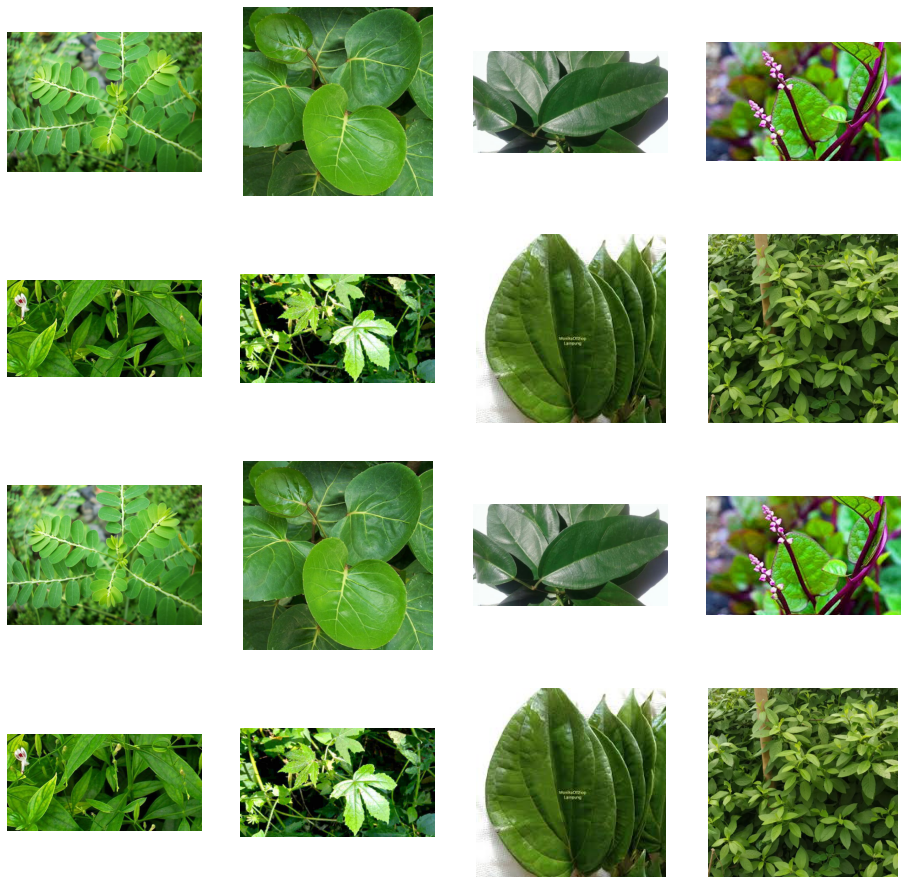

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_daun_pix = [os.path.join(train_daun_dir, fname) 
                for fname in os.listdir(train_daun_dir)[pic_index-8:pic_index]]
next_herbal_pix = [os.path.join(train_herbal_dir, fname) 
                for fname in os.listdir(train_herbal_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_daun_pix+next_herbal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [38]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [39]:
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [40]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (54, 150, 150, 3)
Train Label =  (54,)
Validation Data =  (54, 150, 150, 3)
Validation Label =  (54,)


In [41]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [12 47 28]
Data setelah di-normalisasi  [0.04705882 0.18431373 0.10980392]


In [86]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[99:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[2:20])

Label sebelum di-encoder  []
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0]


**DEFINISIKAN MODEL**

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [48]:
img_input = layers.Input(shape=(100, 100, 3)) 
x = layers.Flatten()(img_input) 
x = layers.Dense(128, activation='relu')(x) 
output = layers.Dense(1, activation='sigmoid')(x) 

model = Model(img_input, output)

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3840128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,840,257
Trainable params: 3,840,257
Non-trainable params: 0
_________________________________________________________________


In [54]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [79]:
 H = model.fit(x_train, y_train, batch_size=1, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20


ValueError: ignored

**EVALUASI MODEL**

In [65]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show() 

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [72]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), d.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), .history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [66]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

ValueError: ignored